- [ ] Fourier transform thing
    - [ ] 1. Do Fourier transform of image, select the top k moments
    - [ ] 2. See how many we need to classify properly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../../")
import src.paper_utils as utils

In [257]:
def lowpass_zigzag1d(img, k):
    """
    Applies a low pass filter to the Fourier transform of an image,
      keeping only the lowest k frequencies in a zig-zag pattern.

    Parameters:
    img (ndarray): The input image.
    k (int): The number of frequencies to keep.

    Returns:
    ndarray: The masked fourier frequencies.
    """
    img = img.reshape((11,11))
    f = np.fft.fft2(img)
    mask = np.zeros_like(f, dtype=bool).reshape((121))
    zz_indices = np.concatenate([np.diagonal(a[::-1,:], i)[::(2*(i % 2)-1)] for i in range(1-a.shape[0], a.shape[0])])
    mx = np.min((k, len(zz_indices)-1))

    mask[zz_indices[:mx]] = True
    f_masked = f * mask.reshape((11,11))
    return f_masked.real.ravel()


def items_above_diagonal(n):
    """
    Compute the number of items above each diagonal in a square matrix.

    Parameters:
    n (int): The size of the square matrix.

    Returns:
    list: The number of items above each diagonal.
    """
    return [i**2 for i in range(1, n+1)]


In [269]:
n = 11
dirname = "../../data/OUTPUT/mcm/fourier/"

for k in items_above_diagonal(n): # take fair samples
    k_path = os.path.join(dirname, f"{k}")
    os.makedirs(k_path, exist_ok=True)
    for digit in range(10):
        # train data
        img = np.genfromtxt(f"../../data/INPUT_all/data/train-images-unlabeled-{digit}.dat",delimiter=1, dtype=int)
        freq = np.apply_along_axis(lambda x: binarize_image(lowpass_zigzag1d(x, k)).astype(int), axis=1, arr=img)
        np.savetxt(os.path.join(k_path,f"fourier-images-unlabeled-{digit}.dat"),freq,fmt="%d", delimiter="")

        # test data
        img = np.genfromtxt(utils.load_test_data(digit,all_data_path="../../data/INPUT_all/data/testdata_separated"),delimiter=1,dtype=int)
        freq = np.apply_along_axis(lambda x: binarize_image(lowpass_zigzag1d(x, k)).astype(int), axis=1, arr=img)
        np.savetxt(os.path.join(k_path,f"testfourier-images-unlabeled-{digit}.dat"),freq,fmt="%d", delimiter="")

1. convert test images as well for different k
2. For a k. Fit each MCM and get test accuracy
3. Build a plot over i guess average test accuracy for all digits over k

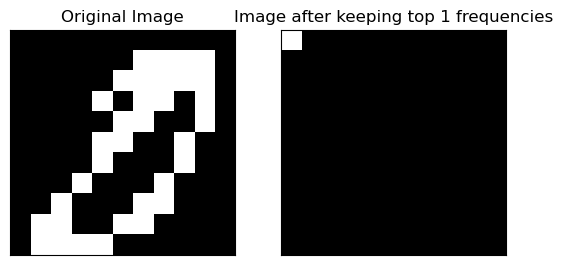

In [233]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(frequ, cmap = 'gray')
plt.title(f'Image after keeping top {k} frequencies'), plt.xticks([]), plt.yticks([])
plt.show()

# -------------------------

In [ ]:
# def gen_testimage():
#     x = np.arange(-500, 501, 1)
#     X, Y = np.meshgrid(x, x)
#     wavelength = 100
#     angle = np.pi/9
#     grating = np.sin(
#         2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
#     )
#     return grating
# def fft2d(img):
#     """
#     Perform a 2D Fast Fourier Transform (FFT) on the input image.

#     :param img: The input image to be transformed.
#     :type img: numpy.ndarray

#     :return: The transformed image.
#     :rtype: numpy.ndarray
#     """
#     ft = np.fft.ifftshift(img)
#     ft = np.fft.fft2(img)
#     return np.fft.fftshift(ft)


# def ifft2d(ft):
#     """
#     Perform 2D real inverse fast Fourier transform (IFFT) on the input array.

#     Parameters:
#     ft (ndarray): The input array containing the Fourier transform.

#     Returns:
#     ndarray: The inverse Fourier transform of the input array.

#     """
#     ift = np.fft.ifftshift(ft)
#     ift = np.fft.ifft2(ift)
#     ift = np.fft.fftshift(ift)
#     return ift.real 

In [ ]:
# def keep_lowest_k_frequencies(img, k):
#     """
#     Applies a low pass filter to the Fourier transform of an image,
#       keeping only the lowest k frequencies.

#     Parameters:
#     img (ndarray): The input image.
#     k (int): The number of frequencies to keep.

#     Returns:
#     ndarray: The reconstructed image after applying the mask to the Fourier transform.
#     """

# def keep_lowest_k_frequencies(img, k,all_direction=False):
#     """
#     Applies a low pass filter to the Fourier transform of an image,
#       keeping only the lowest k frequencies.

#     Note: Here, we shift so we select frequencies in all directions.
#       If we were not to shift, only horizontal and vertical would be preseved.

#     Parameters:
#     img (ndarray): The input image.
#     k (int): The number of frequencies to keep.

#     Returns:
#     ndarray: The reconstructed image after applying the mask to the Fourier transform.
#     """
#     f = np.fft.fft2(img)
#     if all_direction:
#       # Select a square region at the center after shift
#       fshift = np.fft.fftshift(f)
#       mask = np.zeros_like(fshift, dtype=bool)
#       center = tuple(map(lambda x: x // 2, mask.shape))
#       indices = np.ogrid[:mask.shape[0], :mask.shape[1]]
#       mask[(indices[0] - center[0])**2 + (indices[1] - center[1])**2 <= k**2] = True
#       fshift_masked = fshift * mask
#       f_ishift = np.fft.ifftshift(fshift_masked)
#       img_back = np.fft.ifft2(f_ishift)
#     else:
#       # Select top left corner
#       mask = np.zeros_like(f, dtype=bool) 
#       mask[:k, :k] = True
#       f_masked = f * mask
#       img_back = np.fft.ifft2(f_masked)

#     return np.real(img_back)



# # Test the function
# k = 10
# img = np.genfromtxt("../data/INPUT_all/data/train-images-unlabeled-5.dat",delimiter=1, dtype=int)[0].reshape((11,11))
# img_back = keep_lowest_k_frequencies(img, k)
# img_back = binarize_image(img_back)

# # Visualize the results
# plt.subplot(121),plt.imshow(img, cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
# plt.title(f'Image after keeping top {k} frequencies'), plt.xticks([]), plt.yticks([])
# plt.show()